In [325]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
import pandas as pd
import numpy as np
from math import pi
import requests
from time import time
from datetime import datetime, timedelta
import random
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
players = pd.read_csv('data.csv')

In [3]:
players.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
players.drop('Unnamed: 0', axis=1, inplace=True)
players = players.dropna(subset=['Club', 'Position'])
players[['Release Clause','Loaned From','Joined']] = players[['Release Clause',
                                                              'Loaned From',
                                                              'Joined']].fillna('No data')
players = players.fillna(0)
players = players.reset_index()

In [7]:
players.head()

,index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
def defending(players):
    return int(round((players[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(players):
    return int(round((players[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(players):
    return int(round((players[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(players):
    return int(round((players[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(players):
    return int(round((players[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))

def power(players):
    return int(round((players[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(players):
    return int(round((players[['Potential', 'Overall']].mean()).mean()))

def shooting(players):
    return int(round((players[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [10]:
timeFinifih = 0

start_time = time()

players['Defending'] = players.apply(defending, axis=1)
players['General'] = players.apply(general, axis=1)
players['Mental'] = players.apply(mental, axis=1)
players['Passing'] = players.apply(passing, axis=1)
players['Mobility'] = players.apply(mobility, axis=1)
players['Power'] = players.apply(power, axis=1)
players['Rating'] = players.apply(rating, axis=1)
players['Shooting'] = players.apply(shooting, axis=1)

timeFinifih += (time() - start_time)

print('Ending - time: ' + str(timedelta(seconds=timeFinifih)))

Ending - time: 0:04:08.883886


In [11]:
players.head()

,index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,8.0,€226.5M,29,89,71,87,91,74,94,88
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,11.0,€127.1M,27,88,73,81,91,83,94,88
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,11.0,€228.1M,28,85,72,80,94,69,92,84
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,94.0,€138.6M,16,26,43,39,66,54,92,21
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,13.0,€196.4M,59,79,81,92,81,76,92,85


In [378]:
players.rename(columns={'Club Logo':'Club_Logo', 'Preferred Foot' : 'Preferred_Foot', 'Body Type' : 'Body_Type',
                       'Jersey Number' : 'Jersey_Number', 'Loaned From' : 'Loaned_From', 
                        'Contract Valid Until' : 'Contract_Valid'}, inplace=True)

In [382]:
data = players[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','GKDiving', 
                'GKHandling', 'GKKicking', 'GKReflexes','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club', 'Position', 
                'Value', 'Wage','Preferred_Foot','Body_Type','Jersey_Number',
                'Joined','Loaned_From','Height','Weight','Contract_Valid']]

In [633]:
def detalle(row, name, image, age, nationality, photo, logo, club, position):
    
    flag_image = "example/img_flag.jpg"
    player_image = "example/img_player.jpg"
    logo_image = "example/img_club_logo.jpg"
    fondo_grafico = mpimg.imread('example/fondo.jpg')
    face_photo = photo
     
    not_found = 'https://cdn.sofifa.org/players/4/notfound_0.png'
    r = requests.get(face_photo)
    
    if r.status_code == 404:
        face_photo = face_photo.replace(face_photo, not_found)
        
    img_flag = requests.get(image).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)
    
    player_img = requests.get(face_photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
     
    logo_img = requests.get(logo).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)

    basic_color = '#37474f'
    color_annotate = '#01579b'

    plt.figure(figsize=(15,8))
    categories=list(data)[1:]
    
    if position != 'GK':
        categories_no_graph = ['Defending','General','Mental','Passing','Mobility','Power','Rating','Shooting']
        categories_drop = ['GKDiving','GKHandling', 'GKKicking', 'GKReflexes']
        valuesUseGraph = [data.Defending[row], data.General[row], data.Mental[row], data.Passing[row], data.Mobility[row],
                           data.Power[row],data.Rating[row],data.Shooting[row]]    
    else:
        categories_no_graph = ['GKDiving','GKHandling', 'GKKicking', 'GKReflexes', 'Rating']
        categories_drop = ['Shooting','Power', 'Mobility', 'Passing', 'Mental', 'Defending', 'General']
        valuesUseGraph = [data.Rating[row], data.GKDiving[row], data.GKHandling[row], data.GKKicking[row], data.GKReflexes[row]] 
                               
    N = len(categories_no_graph)
    
    for i in categories_drop:
        if i in categories:
            categories.remove(i)
            
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)

    values = data.loc[row].drop('Name').values.flatten().tolist() 
                           
    values = [e for e in values if e in (valuesUseGraph)]
    values += values[:1]
 
    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= color_annotate, alpha=0.5)

    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    img = mpimg.imread(flag_image)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    ax_fondo = plt.gcf().add_axes(axes_coords, zorder=1)
    ax_fondo.axis('off')
    fondo = ax_fondo.imshow(fondo_grafico, alpha=0.2)
    clip = [c for c in ax.get_children() if type(c) == matplotlib.patches.Wedge][0]
    fondo.set_clip_path(clip)

    ax.annotate('Nacionality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
        
    ax.annotate('Name: ' + data.Name[row].upper(), xy=(10,10), xytext=(43, 180),
                fontsize= 13,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    arr_img_player = plt.imread(player_image, format='jpg')
    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    arr_img_logo = plt.imread(logo_image, format='jpg')
    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-320, -226),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)
    
    l1 = mpatches.Patch(color= color_annotate, label='Age: ' + str(int(data.Age[row])))
    l2 = mpatches.Patch(color= color_annotate, label='Position: ' + data.Position[row])
    l3 = mpatches.Patch(color= color_annotate, label='Jersey Number: ' + str(int(data.Jersey_Number[row])))
    l4 = mpatches.Patch(color= color_annotate, label='Height: ' + data.Height[row])
    l5 = mpatches.Patch(color= color_annotate, label='Weight: ' + data.Weight[row])
    l6 = mpatches.Patch(color= color_annotate, label='Body Type: ' + data.Body_Type[row])
    l7 = mpatches.Patch(color= color_annotate, label='Preferred Foot: ' + data.Preferred_Foot[row])
    l8 = mpatches.Patch(color= color_annotate, label= 'Value: ' + data.Value[row])
    l9 = mpatches.Patch(color= color_annotate, label='Wage: ' + data.Wage[row])
    l10 = mpatches.Patch(color= color_annotate, label='Loaned From: ' + data.Loaned_From[row])
    l11 = mpatches.Patch(color= color_annotate, label='Joined: ' + data.Joined[row])
    l12 = mpatches.Patch(color= color_annotate, label='Contract Valid: ' + data.Contract_Valid[row])

    ax.legend(handles=[l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12], bbox_to_anchor=(1.30, 1.08), 
              loc='upper left', borderaxespad=0.)

In [634]:
def graphPolar(id = 0):
    if 0 <= id < len(players.ID):
        detalle(row = data.index[id], 
                name = data['Name'][id], 
                age = data['Age'][id], 
                photo = data['Photo'][id],
                nationality = data['Nationality'][id],
                image = data['Flag'][id], 
                logo = data['Club_Logo'][id], 
                club = data['Club'][id],
                position = data['Position'][id])
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')    

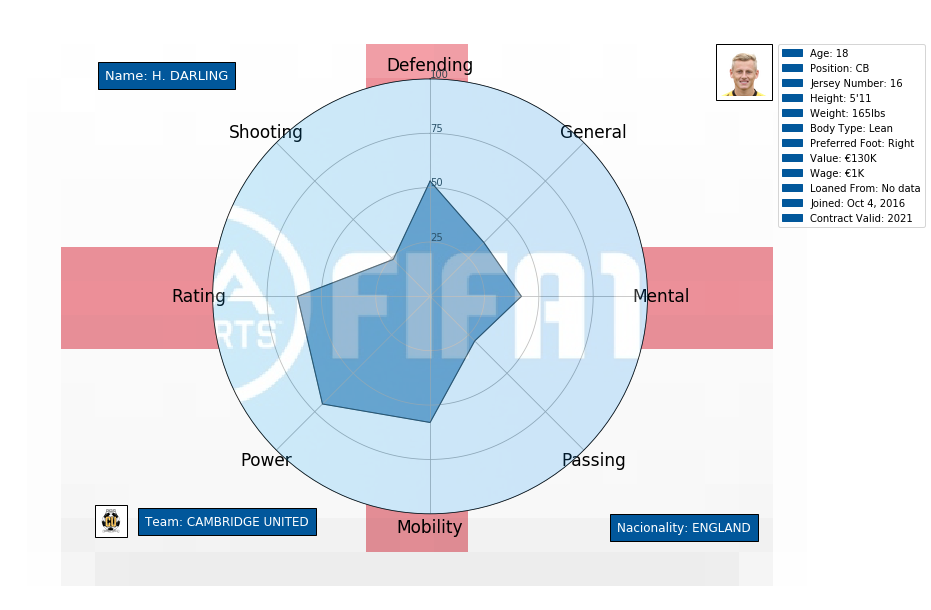

In [639]:
graphPolar(17000)